In [1]:
# from fastai import learner
from fastai.vision.all import *
from fastai.callback.fp16 import *
import numpy as np
import os
import pandas as pd
import librosa as lb
import librosa.display
import soundfile as sf
import matplotlib.patches as patch
import matplotlib.pyplot as plt
import IPython.display as ipd
from pathlib import Path
from tqdm.notebook import tqdm
from scipy.io import wavfile
from torch import cuda
import shutil

CC_ROOT=Path("D:\\KidElectric\\rfcx_kaggle") #Cookiecutter datascience-style project
CC_DATA_OUT=CC_ROOT.joinpath('data').joinpath('interim')
CC_DATA_TEST=CC_DATA_OUT.joinpath('test')
CC_MODEL_ROOT=CC_ROOT.joinpath('models').joinpath('fit')

DATA_ROOT = CC_ROOT.joinpath('data')
TRAIN_AUDIO_ROOT = DATA_ROOT.joinpath('raw').joinpath('train')#Update to point to cookiecutter data/raw/train
TEST_AUDIO_ROOT = DATA_ROOT.joinpath('raw').joinpath('test')#Update to point to cookiecutter data/raw/test


df_train = pd.DataFrame({
    "recording_id": [path.stem for path in TRAIN_AUDIO_ROOT.glob("*.flac")],
})

df_test = pd.DataFrame({
    "recording_id": [path.stem for path in TEST_AUDIO_ROOT.glob("*.flac")],
})

df_tp=pd.read_csv(CC_ROOT.joinpath('references').joinpath('train_tp.csv')).set_index('recording_id')

df_fp=pd.read_csv(CC_ROOT.joinpath('references').joinpath('train_fp.csv')).set_index('recording_id')


In [4]:
cuda.empty_cache()

In [12]:
pngs=[png for png in CC_DATA_OUT.joinpath('train').joinpath('clip_decomp').glob('*.png')]
dest=CC_DATA_OUT.joinpath('train').joinpath('clip_decomp_tp')
for png in pngs:
    if 'TP' in str(png):
        print('Copying %s to %s' % (str(png),str(dest)))
        shutil.copy(str(png),str(dest))
#     elif 'FP' in str(png):
#         p=png.parts[-1].split('.')[0]
#         pp=p.split('_')
#         newfn=''
#         for x in range(len(pp)):
#             if x==1:
#                 newfn=newfn + '_' + '99'
#             else:
#                 newfn=newfn + '_' + pp[x]
#         newfn=newfn[1:] + '.png'
#         print('Copying %s to %s' % (str(png),dest.joinpath(newfn)))
#         shutil.copy(str(png),dest.joinpath(newfn))

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_00d442df7_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_0268057eb_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_03d77fede_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_067f49f8b_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_067f49f8b_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_06a0c48c9_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_0_0ea8ea68a_0.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_cf739c61d_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_cf7af9895_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_d3195bece_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_d5163b4ef_0.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_d5163b4ef_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_dac7a83a3_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_10_dac7a83a3_7.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_471bb3a84_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_4c845907b_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_4c845907b_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_4d54e38a8_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_4d54e38a8_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_515861db9_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_12_5723a520c_1.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_d66a5f57b_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_d66a5f57b_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_d96242159_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_dac0c6cb8_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_ea961733c_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_eeb9a3c4b_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_13_fe8d9ac40_8.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_3ebc2aebe_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_3ffaeaa6c_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_43d34d63c_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_599b19a33_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_599b19a33_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_5c57d8095_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_15_5c57d8095_4.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_e6de52902_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_e6de52902_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_e6de52902_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_e9622376a_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_f33a1793f_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_f5889157c_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_16_f5889157c_9.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_73c4d8db8_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_73c4d8db8_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_755d6c7eb_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_7583b7c0c_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_7583b7c0c_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_7878d8306_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_17_7878d8306_9.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_22050fe3f_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_27b26fe5d_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_27c78408d_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_29b82a129_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_2d09eb065_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_306f98294_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_19_50b93a173_3.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_1ba9ee79a_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_22da462f9_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_247d81f2b_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_247d81f2b_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_24aac801a_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_25de8315e_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_1_2cf89ef6b_4.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_bc32d8c84_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_bdacd5cd2_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_bdacd5cd2_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_cc7c17269_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_cc7c17269_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_ccee900dd_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_20_ccee900dd_9.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_bae8eb497_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_bc18e6dba_0.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_bc18e6dba_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_cc8d81b6a_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_d3324f1c0_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_db86f881b_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_21_dd46cb7e9_8.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_408fcd1dc_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_408fcd1dc_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_45eabd218_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_45eabd218_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_4621de448_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_4621de448_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_48ceeeb96_4.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d5992de83_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d5997789c_0.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d5997789c_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d8b7f9ed6_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d8b7f9ed6_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d91f25ca7_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_23_d91f25ca7_3.png 

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_5280a7fe9_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_534b6a4a0_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_541550e6c_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_581d07559_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_5877cea08_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_5b54af5a2_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_3_6102fb9d6_2.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_a5ceef07b_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_abbef468c_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_addfd4f67_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_af15de055_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_b2ea74670_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_b6ddaa9b4_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_4_b6ddaa9b4_2.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_01b41f92b_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_0509303a5_3.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_0509303a5_4.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_0b3ef9c4e_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_180ba3012_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_19dfeda02_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_6_19dfeda02_3.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_6eb03e9ca_1.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_6eb03e9ca_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_7227068d3_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_77e82339a_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_77e82339a_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_78f515b6f_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_7_838227e71_1.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_d4bb34753_9.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_da0d07110_0.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_e03896110_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_e03896110_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_ea7aa9e69_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_eaf5cf482_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_8_eaf5cf482_9.png to D:\K

Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_b01abd3b2_5.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_b01abd3b2_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_c12e0a62b_2.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_c245b2295_8.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_dee541308_6.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_e666beee8_7.png to D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp_tp
Copying D:\KidElectric\rfcx_kaggle\data\interim\train\clip_decomp\TP_9_f7466aeeb_5.png to D:\K

In [17]:
CC_DATA_OUT.joinpath('clip_decomp').glob('*.png')

<generator object Path.glob at 0x00000259073D98B8>

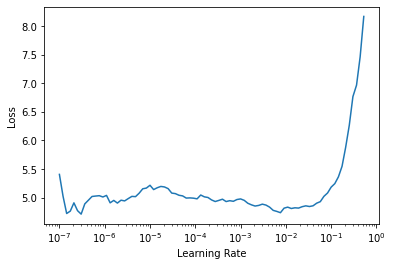

In [28]:
# 1 model trained on TP(24 classes) and FP (as one class)
def which_singer(x): return x.parts[-1].split('_')[1]

path =CC_DATA_OUT.joinpath('train').joinpath('clip_decomp_tp')
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.2, seed=40,
    label_func=which_singer, item_tfms=Resize(128,ResizeMethod.Squish), #resnet18, 512, 30e, Aug1 = 0.244? --> does perform better
    batch_tfms=aug_transforms(mult=2, do_flip=False), #max_rotate=5.0, do_flip=False, flip_vert=False
    num_workers=0,bs=8) # batch_tfms=aug_transforms(mult=2), -- necessary? or no?
#Note: full specs are also now in the tp_clips folder as of 11/23 (not sure if this is good idea)
# learn = cnn_learner(dls, resnet18, metrics=error_rate, cbs=mixup) #error_rate, Ideally LRAP, cnn_learner
learn = cnn_learner(dls, resnet101, metrics=[error_rate, LRAP]) #Note LRAP different than LWLRAP
# learn.fine_tune(50) # loss_func = LabelSmoothingCrossEntropy(), cbs=Mixup
lr_min,lr_steep=learn.lr_find()
# learn.fit_one_cycle(4,3e-3) 
# learn.unfreeze()
# learn.fit_one_cycle(5,lr_max=slice(1e-7,3e-3)) #Set lower learning rate for earlier layers than later layers

In [33]:
# Run a model with mixup:
def which_singer(x): return x.parts[-1].split('_')[1]

path =CC_DATA_OUT.joinpath('train').joinpath('clip_decomp_tp')
mixup = MixUp(0.5) # LRAP of 0.81 with 0.5 (resnet101)--> LWRAP 0.705 all said and done [without no positive (NP_98) clips]
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=which_singer, item_tfms=Resize(434,ResizeMethod.Squish), 
    batch_tfms=aug_transforms(mult=2, do_flip=False), #max_rotate=5.0, do_flip=False, flip_vert=False
    num_workers=0,bs=6) # batch_tfms=aug_transforms(mult=2), -- necessary? or no?

learn = cnn_learner(dls, resnet101, cbs=mixup,
                    loss_func=CrossEntropyLossFlat(),
                    metrics=[error_rate, LRAP]) #Note LRAP different than LWLRAP
# learn.fine_tune(50) # loss_func = LabelSmoothingCrossEntropy(),
learn.fit_one_cycle(2,3e-3)
learn.unfreeze()
learn.fit_one_cycle(50,lr_max=8.317e-5) #lr_min found by lr_finder

epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.478575,3.754936,0.870588,0.271027,01:10
1,3.813939,3.133065,0.814706,0.334829,01:11
2,3.471904,2.805883,0.800000,0.364901,01:11


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.202724,2.789651,0.802941,0.379292,01:27
1,3.141483,2.529840,0.723529,0.443837,01:27
2,3.198923,2.660185,0.726471,0.436187,01:27
3,3.042357,2.429510,0.711765,0.457403,01:27
4,3.151335,2.459114,0.673529,0.478481,01:27
5,3.078368,2.306905,0.638235,0.508133,01:26
6,3.012534,2.247805,0.614706,0.537690,01:26
7,2.952374,2.237703,0.588235,0.557075,01:27
8,3.159094,2.505362,0.652941,0.510515,01:27
9,2.910743,2.223752,0.594118,0.563627,01:27


In [32]:
lr_min

8.317637839354575e-05

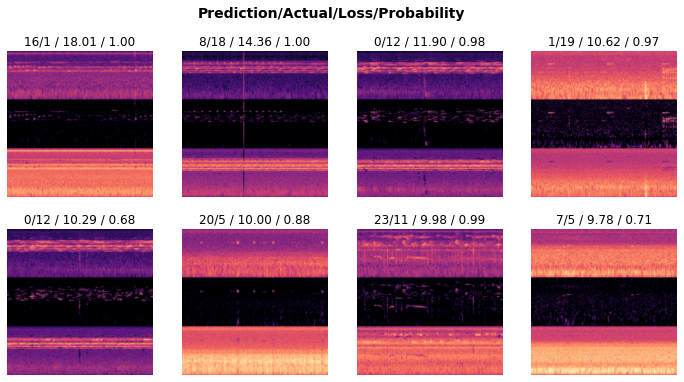

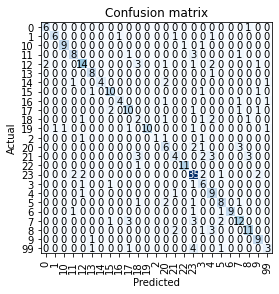

In [14]:
# 
interp = ClassificationInterpretation.from_learner(learn)
#interp.most_confused(min_val=6)
interp.plot_top_losses(8, nrows=2)
interp.plot_confusion_matrix()

In [34]:
# learn.export(fname='resnet34_15epoch_256_clips.pkl')
model_name='rn101_50ep_lr8p32e-10_434_clip_TP_FP_NP_aug2_noflip_120420_mixup0p5.pkl' #FB=
learn.export(fname=CC_MODEL_ROOT.joinpath(model_name)) #30e = 0.717

In [29]:
path=CC_MODEL_ROOT
learn=load_learner(path.joinpath('rn18_30ep_512_clip_full_aug1_medsub_112920_2.pkl'))

In [27]:
#Load in multiple .csv and take the mean:
fns=[CC_MODEL_ROOT.parent.joinpath('predictions').joinpath('rn101_50ep_lr8p32e-10_434_clip_TP_FP_NP_aug2_noflip_120420_mixup0p5-sum.csv'),
     CC_MODEL_ROOT.parent.joinpath('predictions').joinpath('rn50_50ep_224_resamp15_TP_FP_NP_aug2_noflip_19_8_averaged.csv')]
df_load={}
for i,fn in enumerate(fns):
    df_load[i]= pd.read_csv(fn)
b=df_load[0]
for col in df_load[0].columns:
    if col != 'recording_id':
        b[col]=(0.75*df_load[0][col] + 0.25*df_load[1][col])
b.head()
b.to_csv(CC_MODEL_ROOT.parent.joinpath('predictions').joinpath('rn101_plus_rn50_8average.csv'),
        index=False)

# Notes
* Resnet 18 seems to do a bit better than 34 up to 20 epochs. 
* resnet18 512px squished 20 epochs data aug 2x with full TP and TP clips, clip median sub from each cip (old method) currently best performing (0.686 on competition).
* Resnet34 takes up less CUDA memory with larger image sizes -- > could try full 1080x1080 with additional info added to top pixels, if memory allows.
* Really need to implement the metric used by the competition! *from sklearn.metrics import label_ranking_average_precision_score* -- > where can I put this in fastai framework?
* Could create a new set of clips with:
1. Median as a seperate column at the end (or above as stated above)
2. Multi-true positive long clips with 1 TP removed (use even more of available data)
2. Take TP clips and concatenate random FP clips of different ID (i.e. train FP through ignoring)

In [ ]:
#Added to fastai/metrics.py: LRAP
import numpy as np
def LRAP(inp, targ, sigmoid=True):
    "Label ranking average precision -BI"
    if sigmoid: inp = inp.sigmoid()
    pred=inp.cpu().numpy()
    targ_v=targ.cpu().numpy()
    targ_array=np.zeros(pred.shape)
    for i,t in enumerate(targ_v):
        targ_array[i,t]=1
    return skm.label_ranking_average_precision_score(targ_array,pred)

In [3]:
# Train many smaller models using mixup on randomly subsampled image sets (n=50 to start)
def which_singer(x): return x.parts[-1].split('_')[1]
rs = 33
path =CC_ROOT.joinpath('data').joinpath('processed').joinpath('resamp_%d' % rs)
nmodels=10
mixup = MixUp(0.5)
epochs=50
pix=512
resume=5
custom_range=range(resume,nmodels,1)
for i in custom_range:
    subset=path.joinpath(str(i))
    dls = ImageDataLoaders.from_path_func(
        subset, get_image_files(subset), valid_pct=0.2, seed=42,
        label_func=which_singer, item_tfms=Resize(pix,ResizeMethod.Squish), 
        batch_tfms=aug_transforms(mult=2, do_flip=False),
        num_workers=0,bs=5) #Try smaller batch size?

    learn = cnn_learner(dls, resnet101, cbs=mixup,
                        loss_func=CrossEntropyLossFlat(),
                        metrics=[error_rate, LRAP]) 
    learn.fine_tune(50)
    model_name='rn101_%dep_%d_resamp%d_TP_aug2_noflip_mixup0p5_%d.pkl' % (epochs,pix,rs,i)
    mpath=path.joinpath('models')
    if mpath.exists() == False:
        os.makedirs(mpath)
    learn.export(fname=mpath.joinpath(model_name)) #30e = 0.717

epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.467461,4.684030,0.924051,0.240759,00:45


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.132420,3.457618,0.886076,0.264123,00:50
1,3.728476,3.197672,0.873418,0.283845,00:50
2,3.783593,3.332750,0.854430,0.327511,00:50
3,3.639508,3.671697,0.829114,0.330465,00:50
4,3.550611,3.354876,0.784810,0.379868,00:50
5,3.384416,2.955396,0.746835,0.410807,00:50
6,3.389117,2.543513,0.683544,0.479025,00:50
7,3.355206,2.585645,0.670886,0.479483,00:50
8,3.334081,2.850324,0.708861,0.425044,00:50
9,3.337574,2.733502,0.740506,0.422253,00:50


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.606130,4.101020,0.905063,0.242148,00:42


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.834276,3.291977,0.803797,0.332877,00:50
1,3.872230,3.404490,0.822785,0.325458,00:50
2,3.726819,2.819878,0.791139,0.366291,00:50
3,3.735170,2.941725,0.791139,0.364317,00:50
4,3.518526,3.074026,0.791139,0.381875,00:50
5,3.459984,3.168443,0.772152,0.394300,00:50
6,3.439924,3.060447,0.778481,0.393471,00:50
7,3.256954,2.647403,0.765823,0.419988,00:50
8,3.284394,2.689556,0.835443,0.367049,00:50
9,3.309271,3.099166,0.816456,0.385575,00:50


RuntimeError: CUDA error: out of memory

In [21]:
resume=3
custom_range=range(resume,nmodels,1)
for i in custom_range:
    print(i)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [9]:
rs

25

In [19]:
# NO mixup. Train several smaller models on randomly subsampled image sets (n=50 to start)
def which_singer(x): return x.parts[-1].split('_')[1]
rs = 33 #Special case: 33 has no FP or NP
path =CC_ROOT.joinpath('data').joinpath('processed').joinpath('resamp_%d' % rs)
nmodels=20
im_size=512
epochs=30
for i in range(nmodels):
    subset=path.joinpath(str(i))
    dls = ImageDataLoaders.from_path_func(
        subset, get_image_files(subset), valid_pct=0.2, seed=42,
        label_func=which_singer, item_tfms=Resize(im_size,ResizeMethod.Squish), 
        batch_tfms=aug_transforms(mult=1, do_flip=False),
        num_workers=0,bs=6)

    learn = cnn_learner(dls, resnet18, metrics=[error_rate, LRAP]) 
    learn.fine_tune(epochs)
    model_name='rn18_%dep_%d_resamp%d_TP_aug1_noflip_%d.pkl' % (epochs,im_size,rs,i)
    mpath=path.joinpath('models')
    if mpath.exists() == False:
        os.makedirs(mpath)
    learn.export(fname=mpath.joinpath(model_name)) #30e = 0.717

epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.298167,3.648514,0.854430,0.298355,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.652360,3.310706,0.854430,0.307442,00:15
1,3.160031,3.295255,0.835443,0.327627,00:15
2,3.098067,2.994443,0.778481,0.390065,00:16
3,3.048027,2.845264,0.715190,0.428848,00:16
4,2.930802,2.731257,0.721519,0.449131,00:16
5,2.586912,2.729160,0.639241,0.488845,00:16
6,2.417082,2.646268,0.677215,0.473937,00:16
7,2.412618,2.776703,0.670886,0.483282,00:16
8,2.318332,2.410812,0.563291,0.574522,00:16
9,2.152006,2.335166,0.594937,0.556645,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.222761,3.454559,0.848101,0.300004,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.496367,3.003953,0.848101,0.332732,00:16
1,3.235372,2.812620,0.784810,0.387349,00:16
2,3.049513,2.558506,0.696203,0.457669,00:16
3,2.939061,2.470508,0.721519,0.449789,00:16
4,2.802017,2.682704,0.702532,0.452797,00:16
5,2.706619,2.483516,0.632911,0.501313,00:16
6,2.588087,2.473146,0.670886,0.494380,00:16
7,2.500536,2.219618,0.658228,0.519213,00:16
8,2.238360,2.364127,0.651899,0.528130,00:16
9,2.214886,2.067053,0.575949,0.585585,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.367775,3.408736,0.829114,0.313908,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.634262,3.005686,0.772152,0.377763,00:16
1,3.235285,2.877710,0.772152,0.393652,00:16
2,3.073456,2.767651,0.753165,0.401279,00:16
3,2.879579,2.706546,0.746835,0.422980,00:16
4,2.757212,2.597720,0.683544,0.469626,00:17
5,2.702441,2.762611,0.677215,0.477559,00:16
6,2.486182,2.402950,0.639241,0.512724,00:16
7,2.289049,2.424683,0.658228,0.516073,00:16
8,2.077154,2.402138,0.670886,0.525575,00:16
9,2.040278,2.405563,0.613924,0.558535,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.134084,3.479112,0.867089,0.299608,00:18


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.488910,3.071694,0.797468,0.348549,00:16
1,3.382776,2.735467,0.822785,0.369858,00:16
2,3.131033,2.754937,0.765823,0.383266,00:16
3,2.953117,2.683331,0.759494,0.397686,00:16
4,2.872784,2.504721,0.715190,0.455596,00:16
5,2.672126,2.768539,0.715190,0.433850,00:16
6,2.566118,2.511494,0.664557,0.493694,00:16
7,2.483890,2.241753,0.607595,0.552549,00:16
8,2.286888,2.259129,0.626582,0.540582,00:16
9,2.091377,2.262400,0.594937,0.553364,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.250796,3.363188,0.848101,0.311907,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.584895,3.043780,0.816456,0.355865,00:16
1,3.319819,2.828572,0.778481,0.383432,00:16
2,3.316904,2.731274,0.746835,0.414624,00:16
3,3.034201,2.640782,0.753165,0.426606,00:16
4,2.780642,2.438000,0.702532,0.478902,00:16
5,2.687490,2.635985,0.664557,0.494052,00:16
6,2.418381,2.375093,0.626582,0.533434,00:16
7,2.479065,2.526093,0.626582,0.529114,00:16
8,2.475936,2.070420,0.607595,0.568708,00:16
9,2.210493,2.003654,0.531646,0.602129,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.536461,3.472082,0.829114,0.309825,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.552373,3.031811,0.803797,0.351612,00:16
1,3.446090,2.694021,0.759494,0.407461,00:16
2,3.187903,2.680535,0.765823,0.406607,00:16
3,2.982927,2.577816,0.715190,0.439745,00:16
4,2.869116,2.375761,0.645570,0.511555,00:16
5,2.727962,2.220260,0.594937,0.550974,00:16
6,2.648741,2.324697,0.645570,0.506324,00:16
7,2.498463,2.114980,0.588608,0.569662,00:16
8,2.447670,2.090397,0.601266,0.563704,00:16
9,2.343538,2.368221,0.632911,0.527177,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.159276,3.742287,0.905063,0.269099,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.690148,3.292132,0.816456,0.328825,00:16
1,3.282917,3.060016,0.810127,0.353317,00:16
2,3.021467,2.819045,0.746835,0.397407,00:16
3,2.946222,2.769929,0.727848,0.437506,00:16
4,2.875281,2.708410,0.715190,0.449215,00:16
5,2.604179,2.779907,0.715190,0.448340,00:16
6,2.536319,2.377858,0.651899,0.518023,00:16
7,2.333010,2.145220,0.512658,0.611894,00:16
8,2.230671,2.277874,0.607595,0.548691,00:16
9,2.119675,2.174833,0.569620,0.583700,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.121224,3.198294,0.803797,0.353872,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.538402,2.942159,0.740506,0.404220,00:16
1,3.207251,2.819970,0.746835,0.403581,00:16
2,3.068594,2.752912,0.715190,0.424576,00:16
3,2.883342,2.596899,0.727848,0.438100,00:16
4,2.657388,2.392384,0.677215,0.488902,00:16
5,2.629137,2.329311,0.594937,0.540760,00:16
6,2.494426,2.473954,0.708861,0.470948,00:16
7,2.344534,2.252469,0.601266,0.563164,00:16
8,2.366621,2.535826,0.632911,0.539464,00:16
9,2.217168,2.111263,0.588608,0.567321,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.167671,3.517897,0.867089,0.290554,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.541307,3.215459,0.841772,0.313660,00:16
1,3.251823,3.060721,0.816456,0.348987,00:16
2,3.012849,3.140452,0.753165,0.398530,00:16
3,2.840490,3.003310,0.778481,0.389207,00:16
4,2.840852,2.823222,0.740506,0.427087,00:16
5,2.576855,3.106542,0.702532,0.433545,00:16
6,2.684828,2.898171,0.721519,0.436399,00:16
7,2.346069,2.813921,0.696203,0.472114,00:16
8,2.164815,2.781636,0.670886,0.495120,00:16
9,2.138971,2.864897,0.702532,0.472342,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.135557,3.590592,0.822785,0.311180,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.736682,2.992494,0.778481,0.376080,00:16
1,3.471246,2.851897,0.753165,0.407376,00:16
2,3.238006,2.727723,0.702532,0.433964,00:16
3,2.935556,2.575603,0.670886,0.474538,00:16
4,2.726340,2.638667,0.677215,0.479076,00:16
5,2.698523,2.338713,0.626582,0.522847,00:16
6,2.653625,2.291518,0.607595,0.548335,00:16
7,2.476438,2.444703,0.620253,0.533859,00:16
8,2.399196,2.681511,0.683544,0.472992,00:16
9,2.038421,2.510548,0.607595,0.542414,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.208868,3.169241,0.848101,0.318211,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.563024,2.934303,0.765823,0.379390,00:16
1,3.330095,2.724288,0.727848,0.422773,00:16
2,3.208976,2.769868,0.727848,0.429798,00:16
3,2.990583,2.838494,0.734177,0.426382,00:16
4,2.835704,2.464643,0.664557,0.484944,00:16
5,2.635086,2.490048,0.620253,0.514337,00:16
6,2.393780,2.732029,0.670886,0.479701,00:16
7,2.415469,2.511349,0.632911,0.518778,00:16
8,2.198527,2.281112,0.639241,0.536958,00:16
9,2.208963,2.175096,0.588608,0.570591,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.301897,3.209710,0.835443,0.318528,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.696234,2.960693,0.835443,0.328819,00:16
1,3.496094,2.949441,0.816456,0.349354,00:16
2,3.106061,2.813143,0.765823,0.395873,00:16
3,3.094897,2.694017,0.753165,0.421695,00:16
4,2.896245,2.875206,0.727848,0.424568,00:16
5,2.773979,2.844595,0.746835,0.432864,00:16
6,2.653473,2.530852,0.651899,0.504905,00:16
7,2.406972,2.980620,0.689873,0.476773,00:16
8,2.266564,2.480193,0.607595,0.538879,00:16
9,2.106142,2.362928,0.626582,0.536086,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.088231,3.220847,0.841772,0.323575,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.437023,3.025607,0.841772,0.331502,00:16
1,3.318741,2.765257,0.784810,0.391835,00:16
2,3.290756,2.482630,0.702532,0.458207,00:16
3,2.954939,2.774797,0.765823,0.399249,00:16
4,2.998261,2.747439,0.759494,0.403679,00:16
5,2.780333,2.938045,0.740506,0.431156,00:16
6,2.549370,2.606537,0.727848,0.452458,00:16
7,2.526789,2.620604,0.651899,0.502054,00:16
8,2.278850,2.375776,0.645570,0.522320,00:16
9,2.156805,2.212797,0.594937,0.562489,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.295792,3.264038,0.848101,0.318406,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.497329,2.874050,0.784810,0.376481,00:16
1,3.216288,2.742850,0.778481,0.399331,00:16
2,3.064778,2.925190,0.803797,0.383518,00:16
3,2.934647,2.625148,0.765823,0.419228,00:16
4,2.744895,2.489854,0.721519,0.468175,00:16
5,2.712897,2.673759,0.702532,0.464801,00:16
6,2.560792,2.500566,0.727848,0.454559,00:16
7,2.525226,2.420682,0.658228,0.497819,00:16
8,2.290340,2.142847,0.563291,0.576769,00:16
9,2.252868,2.010184,0.531646,0.608409,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.243564,3.188296,0.841772,0.321827,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.524550,2.911312,0.822785,0.355647,00:16
1,3.365164,2.683977,0.765823,0.402442,00:16
2,3.119004,2.556654,0.734177,0.432605,00:16
3,2.962900,2.489715,0.727848,0.435539,00:16
4,2.956384,2.500637,0.740506,0.445753,00:16
5,2.735151,2.620071,0.715190,0.461945,00:16
6,2.554259,2.299003,0.689873,0.477344,00:16
7,2.408353,2.360388,0.651899,0.521211,00:16
8,2.454002,2.067698,0.588608,0.571707,00:16
9,2.276113,1.981068,0.556962,0.603051,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.375371,3.417635,0.848101,0.301230,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.627649,2.988076,0.791139,0.351137,00:16
1,3.297469,2.853209,0.734177,0.400470,00:16
2,2.985170,2.661187,0.727848,0.428577,00:16
3,2.750773,2.665811,0.702532,0.452350,00:16
4,2.838422,2.828196,0.696203,0.458339,00:16
5,2.552804,2.548800,0.664557,0.484420,00:16
6,2.392680,2.569147,0.626582,0.501972,00:17
7,2.324825,2.702408,0.664557,0.498403,00:16
8,2.295402,2.234611,0.607595,0.559077,00:16
9,1.975799,2.094680,0.588608,0.567745,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.133401,3.179801,0.835443,0.339238,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.537580,2.867641,0.835443,0.336746,00:16
1,3.386658,2.774775,0.797468,0.381330,00:16
2,3.253796,2.712916,0.778481,0.384128,00:16
3,2.915605,2.682637,0.765823,0.407327,00:16
4,2.757345,2.484632,0.702532,0.468382,00:16
5,2.664798,2.511933,0.670886,0.476307,00:16
6,2.510971,2.622524,0.670886,0.479663,00:16
7,2.566337,2.506278,0.645570,0.511109,00:16
8,2.490350,2.097416,0.582278,0.560212,00:16
9,2.215972,2.218953,0.588608,0.560476,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.249784,3.541178,0.886076,0.282398,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.565227,2.950498,0.848101,0.345452,00:16
1,3.316210,2.826292,0.803797,0.372556,00:16
2,3.021830,2.621100,0.778481,0.417851,00:16
3,2.960832,2.524211,0.696203,0.463671,00:16
4,2.696706,2.246789,0.626582,0.527502,00:16
5,2.595767,2.661181,0.664557,0.504330,00:16
6,2.468052,2.534113,0.664557,0.500616,00:16
7,2.370109,2.431383,0.620253,0.532834,00:16
8,2.230861,2.096501,0.563291,0.588321,00:16
9,2.071533,2.236615,0.601266,0.560390,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.200910,3.466553,0.873418,0.274239,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.529063,3.136080,0.835443,0.322083,00:16
1,3.364965,2.915531,0.797468,0.368917,00:16
2,3.167814,2.806925,0.784810,0.385816,00:16
3,2.869640,2.726279,0.727848,0.424305,00:16
4,2.846989,2.602890,0.708861,0.454807,00:16
5,2.663142,2.482068,0.727848,0.462443,00:16
6,2.357327,2.628848,0.683544,0.498341,00:16
7,2.412421,2.427968,0.689873,0.493818,00:16
8,2.382435,2.481200,0.639241,0.528015,00:16
9,2.112773,2.208870,0.601266,0.551188,00:16


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,4.124603,3.604034,0.911392,0.245508,00:17


epoch,train_loss,valid_loss,error_rate,LRAP,time
0,3.536266,3.135857,0.822785,0.330758,00:16
1,3.327503,2.823219,0.746835,0.422876,00:16
2,3.121055,2.652464,0.746835,0.434048,00:16
3,2.922926,2.481313,0.696203,0.473993,00:16
4,2.731527,2.432395,0.683544,0.473420,00:16
5,2.597740,2.292295,0.632911,0.535220,00:16
6,2.537171,2.361894,0.645570,0.511833,00:16
7,2.386325,2.246149,0.651899,0.526311,00:16
8,2.341049,2.094749,0.563291,0.588583,00:16
9,2.080463,2.292240,0.620253,0.549149,00:16


In [18]:
subset


Path('D:/KidElectric/rfcx_kaggle/data/processed/resamp_15/19')

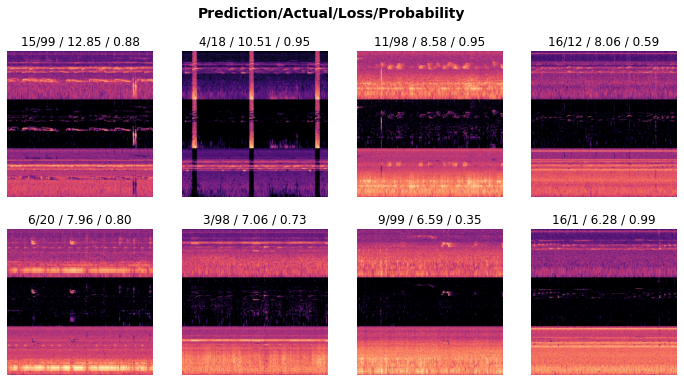

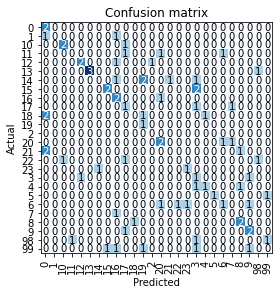

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.most_confused(min_val=6)
interp.plot_top_losses(8, nrows=2)
interp.plot_confusion_matrix()

In [23]:
#Load in multiple .csv and take the mean:
rs=15
nspec=24
path =CC_ROOT.joinpath('data').joinpath('processed').joinpath('resamp_%d' % rs)
mpath=path.joinpath('models')
csv_fns=mpath.glob( model_name[0:-7] + '*.csv')
df_load={}
for i,fn in enumerate(csv_fns):
    df_load[i]= pd.read_csv(fn)
b=df_load[0]
for col in df_load[0].columns:
    if col != 'recording_id':
        for k in df_load.keys():
            b[col]=b[col] + df_load[k][col]
        b[col]= b[col]/nspec
b.head()
b.to_csv(mpath.joinpath('%s_%d_averaged.csv' % (model_name[0:-4],len(df_load))), index=False)
print('Finished')

Finished


# Notes
* 1 resnet50 model got score of (0.467 without mixup, 50 epochs, 224 pixels, aug mult =2), only 15 TP,FP and NP
* Averaging across output of 8 such models got score of: 0.572
* Seems like one way to get higher score would be to train many resnet101 + mixup models, 25 TP, 50FP, 100NP